In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import sys
sys.path.append('/home/abel/personnal_projects/CAC40_stock_prediction/')
from model_v1 import model_v1
from buying_simulation import buying_simulation
from web_scrapper.scrapper import *

nb_years = 11
to_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')
from_date = (datetime.today() - timedelta(days=365*nb_years)).strftime('%Y-%m-%d')
stock_name = 'ENGI.PA'
stock_data_with_date = get_closing_prices(stock_name, from_date, to_date)

[*********************100%***********************]  40 of 40 completed

40 Failed downloads:
['ORA.PA', 'EN.PA', 'AC.PA', 'EL.PA', 'SU.PA', 'RMS.PA', 'BN.PA', 'DG.PA', 'VIE.PA', 'EDEN.PA', 'HO.PA', 'TEP.PA', 'SGO.PA', 'CA.PA', 'VIV.PA', 'MC.PA', 'DSY.PA', 'LR.PA', 'RI.PA', 'RNO.PA', 'SAN.PA', 'STLAP.PA', 'ML.PA', 'OR.PA', 'CAP.PA', 'KER.PA', 'PUB.PA', 'AIR.PA', 'URW.PA', 'BNP.PA', 'SAF.PA', 'ERF.PA', 'ENGI.PA', 'CS.PA', 'STMPA.PA', 'ACA.PA', 'GLE.PA', 'TTE.PA', 'MT.AS', 'AI.PA']: ValueError("time data 'ENGI.PA' does not match format '%Y-%m-%d'")


Empty DataFrame
Columns: [(Adj Close, AC.PA), (Adj Close, ACA.PA), (Adj Close, AI.PA), (Adj Close, AIR.PA), (Adj Close, BN.PA), (Adj Close, BNP.PA), (Adj Close, CA.PA), (Adj Close, CAP.PA), (Adj Close, CS.PA), (Adj Close, DG.PA), (Adj Close, DSY.PA), (Adj Close, EDEN.PA), (Adj Close, EL.PA), (Adj Close, EN.PA), (Adj Close, ENGI.PA), (Adj Close, ERF.PA), (Adj Close, GLE.PA), (Adj Close, HO.PA), (Adj Close, KER.PA), (Adj Close, LR.PA), (Adj Close, MC.PA), (Adj Close, ML.PA), (Adj Close, MT.AS), (Adj Close, OR.PA), (Adj Close, ORA.PA), (Adj Close, PUB.PA), (Adj Close, RI.PA), (Adj Close, RMS.PA), (Adj Close, RNO.PA), (Adj Close, SAF.PA), (Adj Close, SAN.PA), (Adj Close, SGO.PA), (Adj Close, STLAP.PA), (Adj Close, STMPA.PA), (Adj Close, SU.PA), (Adj Close, TEP.PA), (Adj Close, TTE.PA), (Adj Close, URW.PA), (Adj Close, VIE.PA), (Adj Close, VIV.PA), (Close, AC.PA), (Close, ACA.PA), (Close, AI.PA), (Close, AIR.PA), (Close, BN.PA), (Close, BNP.PA), (Close, CA.PA), (Close, CAP.PA), (Close, CS.P

In [16]:
stock_data_with_date.head()

Ticker,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SAN.PA,SGO.PA,STLAP.PA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,URW.PA,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
stock_data = stock_data_with_date.drop(columns=['Date'])
stock_data.head()

In [ ]:
# time_steps = [i for i in range(100, 1000, 100)]
# best_benefits = None
# best_config = None
# best_time_step = None
# for time_step in time_steps:
#     model_manager = model_v1(stock_name, stock_data, time_step_train_split=time_step)
#     predictions = model_manager.predict(model_manager.X_test)
#     config, benefits = buying_simulation(stock_data, predictions)
#     if best_benefits is None or benefits > best_benefits:
#         best_benefits = benefits
#         best_config = config
#         best_time_step = time_step

time_step = 300
model_manager = model_v1(stock_name, stock_data, time_step_train_split=time_step)
predictions = model_manager.predict(model_manager.X_test)
config, benefits = buying_simulation(stock_data, predictions)
stock_data['predictions'] = predictions

Reloading Tuner from tuner_results/stock_prediction_ENGI.PA/tuner0.json
Best Hyperparameters: {'lstm_units': 224, 'dense_units': 64, 'activation_function': 'tanh', 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0014'}


/home/abel/personnal_projects/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 300, 224)       │       202,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 224)            │       402,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,265 (2.36 MB)

 Trainable params: 619,265 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0156 - mae: 0.0803 - val_loss: 0.0010 - val_mae: 0.0220
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.6192e-04 - mae: 0.0193 - val_loss: 8.8483e-04 - val_mae: 0.0201
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.5146e-04 - mae: 0.0185 - val_loss: 7.7734e-04 - val_mae: 0.0187
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.3262e-04 - mae: 0.0208 - val_loss: 8.3497e-04 - val_mae: 0.0201
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.2712e-04 - mae: 0.0180 - val_loss: 7.5512e-04 - val_mae: 0.0202
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.8703e-04 - mae: 0.0164 - val_loss: 6.0151e-04 - val_mae: 0.0174
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.3010e-04 - mae: 0.0156 - val_loss: 5.1289e-04 - val_mae: 0.0155
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.5362e-04 - mae: 0.0166 - val_loss: 6.1226e-04 - val_mae: 0.

/tmp/ipykernel_65859/1691161522.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['predictions'] = predictions


In [ ]:
aligned_data = stock_data.iloc[time_step:].copy()
aligned_data['Next_Day_Prediction'] = predictions[:-1]  # Align predictions with the next day
aligned_data['Date'] = stock_data_with_date['Date']  # Add dates

# Save the dataset to a CSV file
aligned_data[['Date', 'Next_Day_Prediction']].to_csv(f'{stock_name}_predictions.csv', index=False)

print(f"Dataset with predictions saved to {stock_name}_predictions.csv")

Dataset with predictions saved to ENGI.PA_predictions.csv


In [ ]:
original_data = stock_data.values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

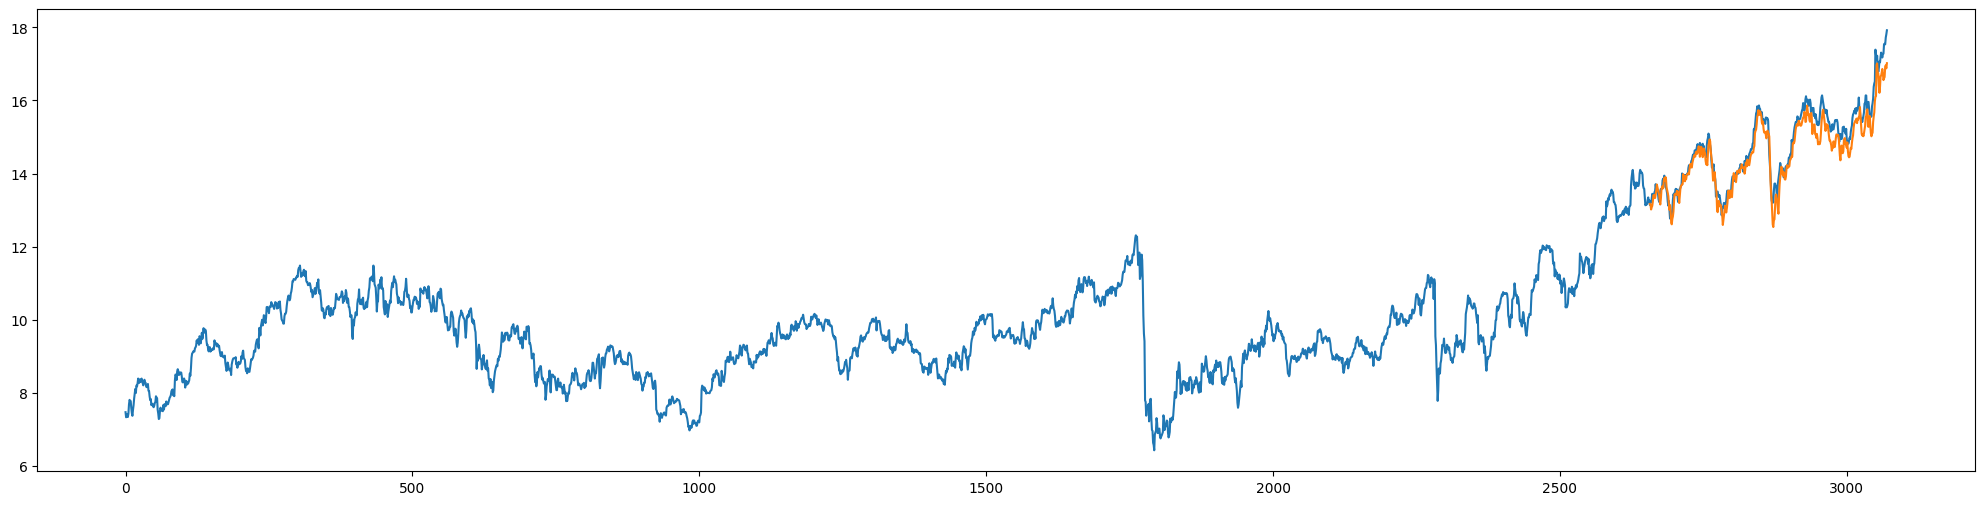

In [ ]:
plt.figure(figsize=(25, 6))
plt.plot(original_data)
plt.plot(predicted_data)

In [ ]:
validation_days = 26
new_predictions = model_manager.predict(model_manager.X_test[-validation_days:])
predicted_data = np.append(predicted_data, new_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


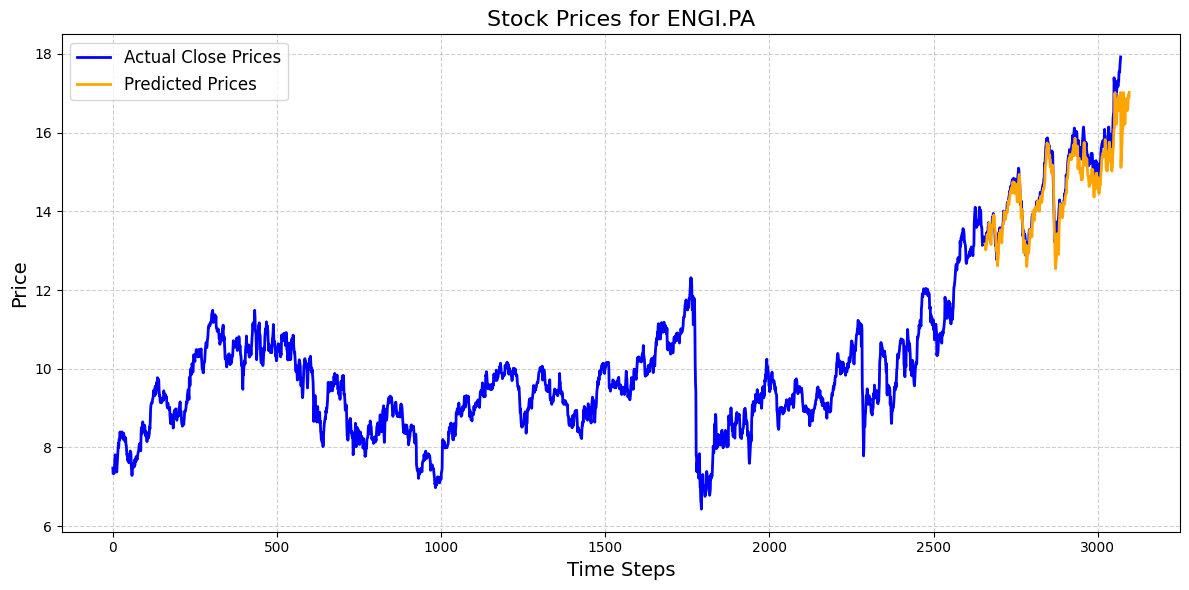

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the entire Actual Close Prices in blue
plt.plot(stock_data.values, label='Actual Close Prices', color='blue', linewidth=2)

# Plot the Predicted Prices in orange
plt.plot(predicted_data, label='Predicted Prices', color='orange', linestyle='-', linewidth=2)

# Add labels, title, and legend
plt.title(f"Stock Prices for {stock_name}", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

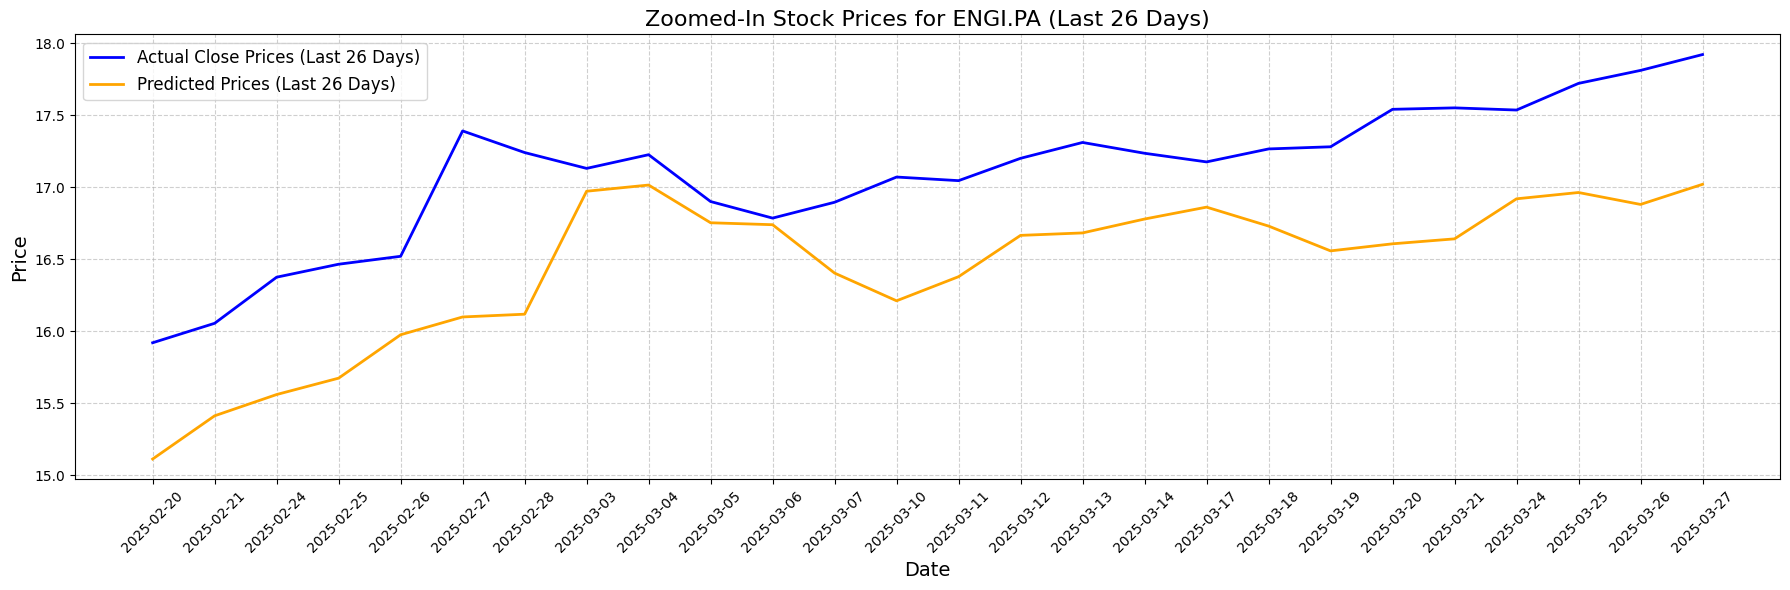

In [ ]:
import matplotlib.dates as mdates

# Extract the last (validation_days) dates from the original dataset
dates = data['Date'][-validation_days:]  # Assuming stock_data has a DateTime index
# print(dates)

plt.figure(figsize=(18, 6))  # Set the figure size

# Plot the last (validation_days + 10) days of Actual Close Prices in blue
plt.plot(dates, stock_data.values[-validation_days:], label=f'Actual Close Prices (Last {validation_days} Days)', color='blue', linewidth=2)

# Plot the last validation_days of Predicted Prices in orange
plt.plot(dates[-validation_days:], predicted_data[-validation_days:], label=f'Predicted Prices (Last {validation_days} Days)', color='orange', linestyle='-', linewidth=2)

# Add labels, title, and legend
plt.title(f"Zoomed-In Stock Prices for {stock_name} (Last {validation_days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability

# Format the x-axis to display dates nicely

plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()